## Class Predictions with Keras ##
Simple 2D data-set example

The `predict_classes()` function that is used that can only be used with `Sequential` models.


In [198]:
#pip install keras
#pip install tensorflow
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler

In [199]:
# load a sample data-set - Digits
from sklearn.datasets import load_digits
digits = load_digits()
print(type(digits))
print(type(digits.data))

<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>


#### View the Data Set ####
We have 1797 rows of 64 features in `digits.data` and a list of 1797 items in `digits.target`

In [200]:
print(digits.data.shape)
print(digits.target.shape)
print(digits.data[0:3])
print(digits.target[0:3])


(1797, 64)
(1797,)
[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]]
[0 1 2]


<class 'numpy.ndarray'>
(64,)
(8, 8)


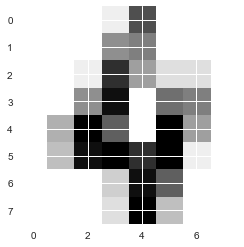

In [201]:
#### Visualise a random sample ####
import matplotlib.pyplot as plt
img = digits.data[4]
print(type(img))
print(img.shape)
img = img.reshape((8,8))
print(img.shape)
plt.imshow(img, interpolation = 'nearest', cmap=plt.cm.binary)

In [202]:
digits.target[1:4]

array([1, 2, 3])

#### Scale the Data-Set ####

In [203]:
#Scale the data
scalar = MinMaxScaler()
scalar.fit(digits.data)
X = scalar.transform(digits.data)

In [204]:
print(digits.data[4])
print(X[4].flatten())

[ 0.  0.  0.  1. 11.  0.  0.  0.  0.  0.  0.  7.  8.  0.  0.  0.  0.  0.
  1. 13.  6.  2.  2.  0.  0.  0.  7. 15.  0.  9.  8.  0.  0.  5. 16. 10.
  0. 16.  6.  0.  0.  4. 15. 16. 13. 16.  1.  0.  0.  0.  0.  3. 15. 10.
  0.  0.  0.  0.  0.  2. 16.  4.  0.  0.]
[0.         0.         0.         0.0625     0.6875     0.
 0.         0.         0.         0.         0.         0.4375
 0.5        0.         0.         0.         0.         0.
 0.0625     0.8125     0.375      0.125      0.125      0.
 0.         0.         0.4375     0.9375     0.         0.5625
 0.53333333 0.         0.         0.35714286 1.         0.625
 0.         1.         0.42857143 0.         0.         0.25
 0.9375     1.         0.8125     1.         0.0625     0.
 0.         0.         0.         0.1875     0.9375     0.625
 0.         0.         0.         0.         0.         0.125
 1.         0.25       0.         0.        ]


In [205]:
#img = X[4].reshape((8,8))
#plt.imshow(img, interpolation = 'nearest', cmap=plt.cm.binary)

#### Split into Training and Test Set ####
Split the data 80 : 20

In [206]:
from sklearn.model_selection import train_test_split
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

#### Train a Model ####


https://keras.io/getting-started/sequential-model-guide/

https://towardsdatascience.com/exploring-activation-functions-for-neural-networks-73498da59b02


** One Hot Encoding **

Followed this example:
    https://chrisalbon.com/machine_learning/preprocessing_structured_data/one-hot_encode_features_with_multiple_labels/  
    
Need to change the classifier 0-9 to a 10 field binary 1/0

In [207]:
#y = digits.target
ylist = y_train.tolist()
ylistlist = []
for i in ylist:
    ylistlist.append([i])


In [208]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit_transform(ylistlist)
one_hot_target = mlb.fit_transform(ylistlist)

In [209]:
mlb.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [216]:
one_hot_target[3]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [217]:
digits.target[3]

3

In [218]:
#X_train.shape

In [219]:
# define the model
model = Sequential()
model.add(Dense(64, input_dim=64, activation='relu'))  #work with 64D data, activation type "Rectified Linear Unit"
model.add(Dense(64, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))     #sigmoid "squashes the output into a (0,1) interval and it’s non linear"
#model.add(Dense(10,activation='softmax'))
model.add(Dense(10,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
# Fit the model
hist = model.fit(X_train, one_hot_target, epochs=10, verbose=0)  # epoc iterations

In [220]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_49 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_50 (Dense)             (None, 10)                650       
Total params: 8,970
Trainable params: 8,970
Non-trainable params: 0
_________________________________________________________________


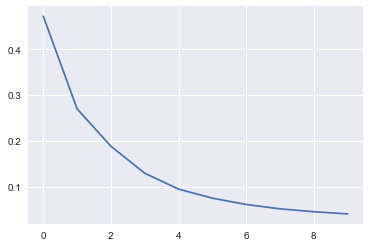

In [221]:
plt.plot(hist.history['loss'])
plt.show()


For ** Saving a Model **   

see this blog: https://machinelearningmastery.com/save-load-keras-deep-learning-models/

#### Use the Model to Make Predictions ####

In [222]:
print(X_test.shape)
print(y_test.shape)

(360, 64)
(360,)


In [223]:
test_predict = model.predict_classes(X_test)

In [224]:
#### Get Accuracy Score and Print Confusion Matrix ####

In [225]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, test_predict)

0.95

[Text(84.4,0.5,'Predicted Label')]

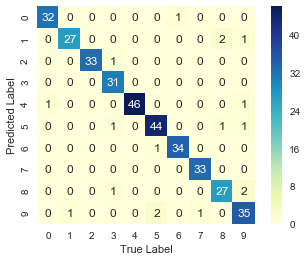

In [227]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

m = confusion_matrix(y_test, test_predict)

ax = sns.heatmap(m.T, square=True, annot=True, fmt='d', cmap="YlGnBu", cbar=True
            , xticklabels=[0,1,2,3,4,5,6,7,8,9]
            , yticklabels=[0,1,2,3,4,5,6,7,8,9])

ax.set(xlabel='True Label')
ax.set(ylabel='Predicted Label')

[Text(92.68,0.5,'Predicted Label')]

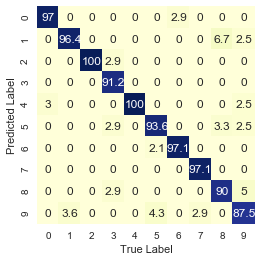

In [232]:
import numpy as np
mperc = np.true_divide(m, m.sum(axis=1, keepdims=True))
mperc = np.round(mperc,3) * 100
#mperc.astype(int)
ax = sns.heatmap(mperc.T, square=True, annot=True, cmap="YlGnBu", cbar=False, fmt='g'
            , xticklabels=[0,1,2,3,4,5,6,7,8,9]
            , yticklabels=[0,1,2,3,4,5,6,7,8,9])

ax.set(xlabel='True Label')
ax.set(ylabel='Predicted Label')